# Clustering HDBScan

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns

# Example 1

In [85]:
from sklearn.datasets import make_blobs

blobs, labels = make_blobs(n_samples = 2000, centers =  4, n_features = 10)

In [86]:
blobs.shape

(2000, 10)

In [87]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,1.796637,9.662034,-6.541448,-1.576478,-5.623067,-10.130102,7.718952,-3.817263,6.126680,-6.063071
1,-9.444946,7.536534,7.075843,-8.490726,7.032872,4.426673,2.204671,8.894301,1.429034,0.480452
2,-5.650299,-4.939307,-3.436493,-10.206072,8.383776,-5.163417,7.904153,-2.636171,-9.275006,-5.380328
3,-8.762490,6.149264,7.175697,-8.923016,5.732600,5.480061,1.957460,10.196547,1.830986,-0.063385
4,-0.697120,-10.380320,0.060884,-2.096591,-0.594205,-2.382898,-1.853241,6.695335,7.384662,-8.860727


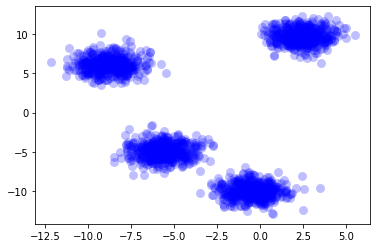

In [88]:
%matplotlib inline
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths':0}

plt.scatter(blobs[:,0], blobs[:,1], c='b', **plot_kwds)

In [89]:
clusterer = hdbscan.HDBSCAN( gen_min_span_tree=True )

clusterer.fit(blobs)

HDBSCAN(gen_min_span_tree=True)

In [90]:
clusterer.labels_

array([0, 3, 2, ..., 3, 2, 2])

In [91]:
pd.crosstab( clusterer.labels_, columns='count' )

col_0,count
row_0,
0,500
1,500
2,500
3,500


In [92]:
clusterer.probabilities_

array([0.77182736, 0.90137037, 0.87948741, ..., 0.84206463, 0.59118098,
       0.89789979])

<AxesSubplot:ylabel='$\\lambda$ value'>

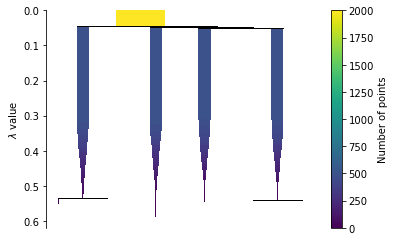

In [93]:
clusterer.condensed_tree_.plot()

# Graphs for the results

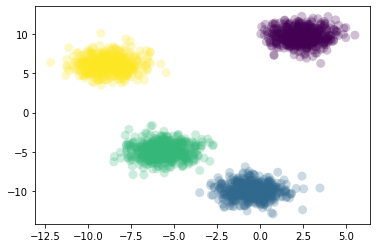

In [94]:
%matplotlib inline
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths':0}

plt.scatter(blobs[:,0], blobs[:,1], c=clusterer.labels_, **plot_kwds)

<AxesSubplot:>

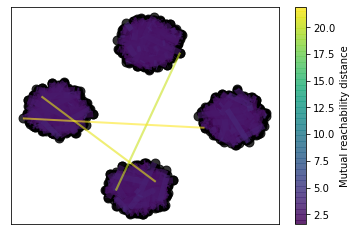

In [97]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

**Identically, we could run hdbscan without a vector space (knowing distance not vectors)**

In [100]:
from sklearn.metrics.pairwise import pairwise_distances

distance_matrix = pairwise_distances(blobs)

clusterer = hdbscan.HDBSCAN(metric='precomputed')

clusterer.fit(distance_matrix)
clusterer.labels_

array([0, 2, 3, ..., 2, 3, 3])

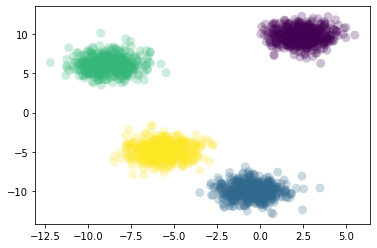

In [101]:
%matplotlib inline
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths':0}

plt.scatter(blobs[:,0], blobs[:,1], c=clusterer.labels_, **plot_kwds)

# Example 2

In [116]:
df = pd.read_csv('Data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


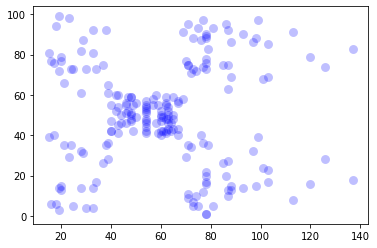

In [118]:
%matplotlib inline
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths':0}

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c='b', **plot_kwds)

In [155]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=9)
clusterer.fit(df)

HDBSCAN(min_cluster_size=9)

In [156]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,48
0,10
1,26
2,21
3,95


# Results in one graph

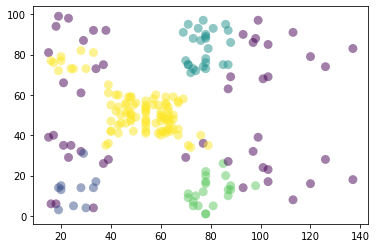

In [157]:
%matplotlib inline
plot_kwds = {'alpha': 0.50, 's': 80, 'linewidths':0}

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=clusterer.labels_, **plot_kwds)

# Example 3

In [158]:
from sklearn import datasets
from sklearn.manifold import TSNE

digits = datasets.load_digits()

data = digits.data

data.shape

(1797, 64)

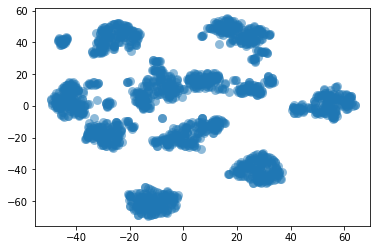

In [161]:
projection = TSNE().fit_transform(data)

plt.scatter(*projection.T, **plot_kwds)

In [167]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15) # min_cluster_size ??
clusterer.fit(projection)

HDBSCAN(min_cluster_size=15)

In [168]:
pd.crosstab(clusterer.labels_, columns='count')

col_0,count
row_0,
-1,22
0,178
1,180
2,178
3,27
4,167
5,195
6,184
7,362


# Results

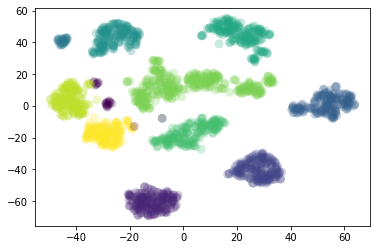

In [169]:
%matplotlib inline
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths':0}

plt.scatter(projection[:,0], projection[:,1], c=clusterer.labels_, **plot_kwds)

<AxesSubplot:ylabel='$\\lambda$ value'>

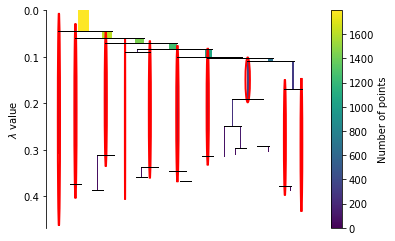

In [170]:
clusterer.condensed_tree_.plot(select_clusters=True,
                              selection_palette=sns.color_palette('deep',8 ))